In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
df = pd.read_csv('drive/MyDrive/ColabNotebooks/milk.csv', sep=";", encoding='windows-1251', skipinitialspace=True)
#df['milk'] = df['milk'].apply(lambda x: x.replace(',','.'))
df['milk'] = pd.to_numeric(df['milk'],errors = 'ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   milk    168 non-null    int64
dtypes: int64(1)
memory usage: 1.4 KB


In [46]:
df

,milk
0,589
1,561
2,640
3,656
4,727
...,...
163,858
164,817
165,827
166,797


In [47]:
# Добавление меток месяцев
rows_in_df = 168
date_list = []
for i in range(1, rows_in_df + 1):
  date_list.append(i)
df['date'] = date_list
df

,milk,date
0,589,1
1,561,2
2,640,3
3,656,4
4,727,5
...,...,...
163,858,164
164,817,165
165,827,166
166,797,167


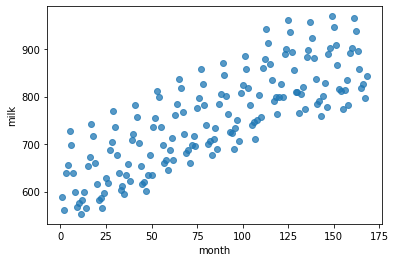

In [48]:
# График исходных данных

plt.scatter(df['date'],df['milk'], alpha=0.75)

plt.xlabel('month')
plt.ylabel('milk')
plt.show()

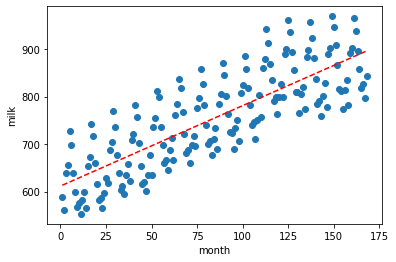

In [49]:
# Линия тренда
x = df['date']
y = df['milk']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xlabel('month')
plt.ylabel('milk')

plt.show()

In [50]:
# Построение модели регрессии
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
y = df.iloc[:,:-1].values
X = df.iloc[:,1:].values

lr.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

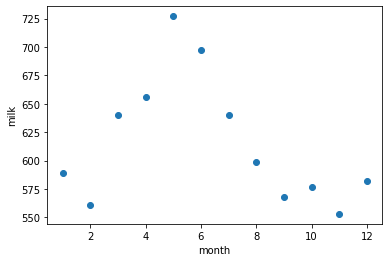

In [62]:
# Пример сезонности за 1 год.
plt.scatter(X[ :12], y[ :12]);

plt.xlabel('month')
plt.ylabel('milk')
plt.show()

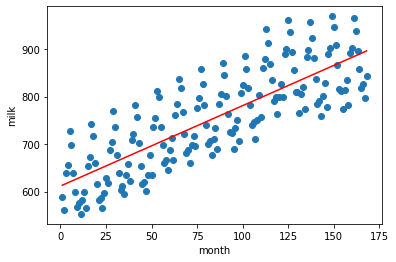

In [52]:
# Регрессия
y_lr = lr.predict(X)

plt.scatter(X, y);
plt.plot (X, y_lr, 'r');

plt.xlabel('month')
plt.ylabel('milk')
plt.show()

In [53]:
# Продление массива на 8 месяцев для создания предсказания
date_list = []
for i in range(169, 177):
  date_list.append(i)
z = np.concatenate((X, np.array(date_list).reshape(-1,1)), axis=0)

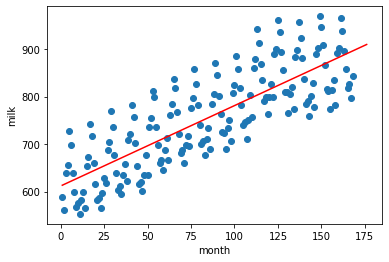

In [54]:
# Предсказание продаж
y_lr = lr.predict(z)

plt.scatter(X, y);
plt.plot (z, y_lr, 'r');

plt.xlabel('month')
plt.ylabel('milk')

plt.show()

In [55]:
#Продажи на прогназируемый период
print(y_lr[-8:])

[[897.73431708]
 [899.42693227]
 [901.11954746]
 [902.81216266]
 [904.50477785]
 [906.19739304]
 [907.89000823]
 [909.58262343]]


In [56]:
# import matplotlib.pyplot as plt
# from matplotlib.dates import (DAILY, DateFormatter,
#                               rrulewrapper, RRuleLocator, drange)
# import datetime

# date = datetime.datetime(2020, 2, 20)
# date += datetime.timedelta(days=1)
# print(date)

# rule = rrulewrapper(DAILY, interval=15)
# loc = RRuleLocator(rule)
# formatter = DateFormatter('%d/%m/%y')

# date1 = datetime.date(2000, 2, 1)
# date2 = datetime.date(2000, 8, 1)

# delta = datetime.timedelta(days=30)
# dates = drange(date1, date2, delta)
# dates



# y_axis = np.arange( len(dates) )
  
# fig, ax = plt.subplots()
# ax.plot_date(dates, y_axis * y_axis)

# ax.xaxis.set_major_locator(loc)
# ax.xaxis.set_major_formatter(formatter)
# ax.xaxis.set_tick_params(rotation=30, labelsize=10)


In [57]:
# import matplotlib.pyplot as plt
# from matplotlib.dates import (MONTHLY, YEARLY, DateFormatter,
#                               rrulewrapper, RRuleLocator, drange)
# import datetime

# # rule = rrulewrapper(YEARLY, byeaster=1, interval=5)
# # loc = RRuleLocator(rule)
# # formatter = DateFormatter('%d/%m/%y')
# # date1 = datetime.date(1952, 1, 1)
# # date2 = datetime.date(2004, 4, 12)
# # delta = datetime.timedelta(days=100)
# # dates = drange(date1, date2, delta)

# # s = np.random.rand(len(dates)) 

# # fig, ax = plt.subplots()
# # plt.plot_date(dates, s)
# # ax.xaxis.set_major_locator(loc)
# # ax.xaxis.set_major_formatter(formatter)
# # ax.xaxis.set_tick_params(rotation=30, labelsize=10)

# rule = rrulewrapper(MONTHLY, interval=6)
# loc = RRuleLocator(rule)
# formatter = DateFormatter('%d/%m/%y')

# fig, ax = plt.subplots()
# plt.plot_date(df['date'],df['sales'])
# ax.xaxis.set_major_locator(loc)
# ax.xaxis.set_major_formatter(formatter)
# ax.xaxis.set_tick_params(rotation=30, labelsize=10)



# plt.scatter(df['date'],df['sales'], alpha=0.65)

# plt.xlabel('date')
# plt.ylabel('sales')
# plt.show()

# df['date'] = df['date'].apply(lambda x: x.timestamp())